<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Idenfication_MoneyVietNam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = 'drive/MyDrive/money_train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Haitramdong'):
    output = 1.0
  if file.startswith('Namtramdong'):
    output = 2.0
  if file.startswith('Motngan'):
    output = 3.0
  if file.startswith('Haingan'):
    output = 4.0
  if file.startswith('Namngan'):
    output = 5.0
  if file.startswith('Muoingan'):
    output = 6.0
  if file.startswith('Haimuoingan'):
    output = 7.0
  if file.startswith('Nammuoingan'):
    output = 8.0
  if file.startswith('Mottramngan'):
    output = 9.0
  if file.startswith('Haitramngan'):
    output = 10.0
  if file.startswith('Namtramngan'):
    output = 11.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(2250, 128, 128, 3) (2250,)


In [2]:
folder = 'drive/MyDrive/money_test/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Haitramdong'):
    output = 1.0
  if file.startswith('Namtramdong'):
    output = 2.0
  if file.startswith('Motngan'):
    output = 3.0
  if file.startswith('Haingan'):
    output = 4.0
  if file.startswith('Namngan'):
    output = 5.0
  if file.startswith('Muoingan'):
    output = 6.0
  if file.startswith('Haimuoingan'):
    output = 7.0
  if file.startswith('Nammuoingan'):
    output = 8.0
  if file.startswith('Mottramngan'):
    output = 9.0
  if file.startswith('Haitramngan'):
    output = 10.0
  if file.startswith('Namtramngan'):
    output = 11.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(500, 128, 128, 3) (500,)


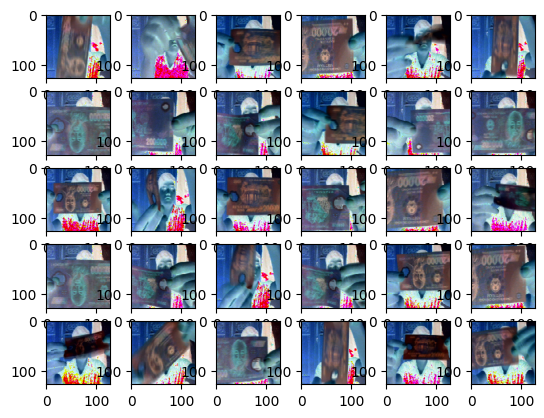

In [3]:
import matplotlib.pyplot as plt
import numpy as np
for chosen_idx in range(30):
  plt.subplot(5,6,chosen_idx+1)
  chosen_img = photos_train[chosen_idx]
  plt.imshow((chosen_img*255).astype(np.uint8))
plt.show()

In [4]:
photos_train = photos_train.reshape(2250, 128, 128, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(500, 128, 128, 3)
photos_test = photos_test.astype('float32')/255



from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((2250, 128, 128, 3), (2250, 12), (500, 128, 128, 3), (500, 12))

In [6]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 128
epochs = 30
classes = 12

model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',
                 input_shape = (128,128,3), padding = 'same')) 
# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'relu', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(64, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [7]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

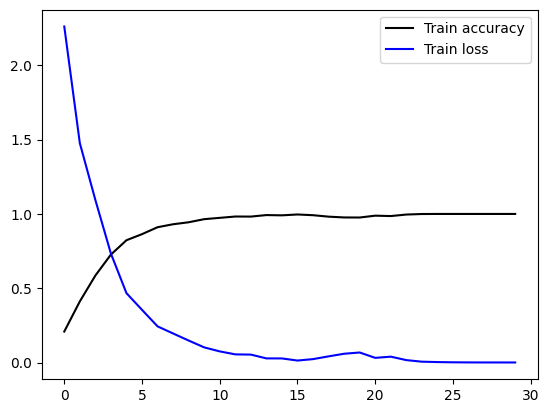

In [8]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [9]:
model.save('drive/MyDrive/modelMoney.h5')

In [33]:
class_Money =    {1: 'Haitramdong',2: 'Namtramdong',3: 'Motngan',
                  4: 'Haingan',5: 'Namngan',6: 'Muoingan',
                  7: 'Haimuoingan',8: 'Nammuoingan',9: 'Mottramngan',
                  10: 'Haitramngan',11: 'Namtramngan'}

1/1 [==============================] - 0s 200ms/step
Predicted:  Haingan


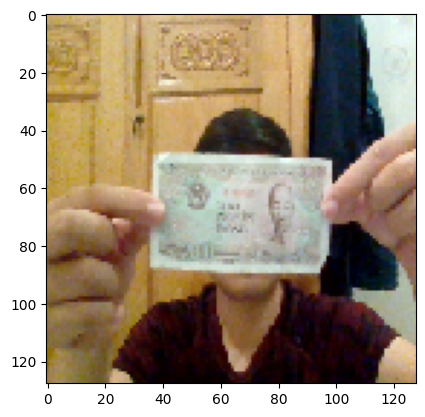

In [12]:
#test
filePath = 'drive/MyDrive/money_test/Haingan205.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 38ms/step
Predicted:  Mottramngan


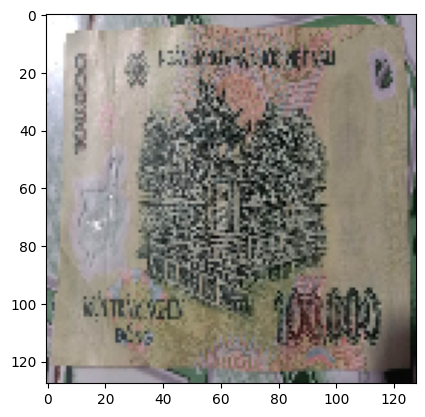

In [15]:
#test
filePath = 'drive/MyDrive/100k.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 74ms/step
Predicted:  Namtramngan


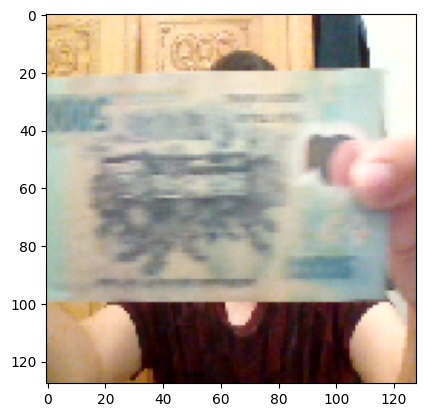

In [37]:
#test

filePath = '/content/drive/MyDrive/money_test/Namtramngan224.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred])
plt.imshow(testImage)